In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_json(r'/content/drive/MyDrive/TFD/Cell_Phones_and_Accessories_5 (1).json', lines = True)

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :),5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so stylish! I have only used one so far and have had it on for almost a year! CAN YOU BELIEVE THAT! ONE YEAR!! Great quality!,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]","Item arrived in great time and was in perfect condition. However, I ordered these buttons because they were a great deal and included a FREE screen protector. I never received one. Though its not ...",4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be used on multiple apple products. especially having nails, it helps to have an elevated key.",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [ ]:
df['overall'].value_counts()

5    108664
4     39993
3     21439
1     13279
2     11064
Name: overall, dtype: int64

In [ ]:
df.isnull().sum()

reviewerID           0
asin                 0
reviewerName      3519
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

In [ ]:
pre = df[['reviewText', 'summary']]
pre['text'] = pre['reviewText']

pre = pre[['text', 'summary']]

pre

,text,summary
0,They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again,Looks Good
1,These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :),Really great product.
2,These are awesome and make my phone look so stylish! I have only used one so far and have had it on for almost a year! CAN YOU BELIEVE THAT! ONE YEAR!! Great quality!,LOVE LOVE LOVE
3,"Item arrived in great time and was in perfect condition. However, I ordered these buttons because they were a great deal and included a FREE screen protector. I never received one. Though its not ...",Cute!
4,"awesome! stays on, and looks great. can be used on multiple apple products. especially having nails, it helps to have an elevated key.",leopard home button sticker for iphone 4s
...,...,...
194434,Works great just like my original one. I really need extras of these for the car and house so love this and the price!,This works just perfect!
194435,Great product. Great packaging. High quality and apple certified. Works greats. This was a good replacement for my apple cable that is falling apart. I highly recommend this cable.,Great replacement cable. Apple certified
194436,"This is a great cable, just as good as the more expensive Apple one. My husband and my daughter both lost their original cables for their iPhones and they went the cheap route, buying a cheap repl...",Real quality
194437,I really like it becasue it works well with my Life Proof case. I do not have to remove the case to charge my phone.,I really like it becasue it works well with my Life Proof ...


In [ ]:
#LSTM with Attention
#pip install keras-self-attention

pre['text'][:10]

0              They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again
1                                           These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :)
2                                     These are awesome and make my phone look so stylish! I have only used one so far and have had it on for almost a year! CAN YOU BELIEVE THAT! ONE YEAR!! Great quality!
3    Item arrived in great time and was in perfect condition. However, I ordered these buttons because they were a great deal and included a FREE screen protector. I never received one. Though its not ...
4                                                                    awesome! stays on, and looks great. can be used on multiple apple products.  especially having nails, it helps 

# Data Cleaning

In [ ]:
import re

#Removes non-alphabetic characters:
def text_strip(column):
    for row in column:
        
        #ORDER OF REGEX IS VERY VERY IMPORTANT!!!!!!
        
        row=re.sub("(\\t)", ' ', str(row)).lower() #remove escape charecters
        row=re.sub("(\\r)", ' ', str(row)).lower() 
        row=re.sub("(\\n)", ' ', str(row)).lower()
        
        row=re.sub("(__+)", ' ', str(row)).lower()   #remove _ if it occors more than one time consecutively
        row=re.sub("(--+)", ' ', str(row)).lower()   #remove - if it occors more than one time consecutively
        row=re.sub("(~~+)", ' ', str(row)).lower()   #remove ~ if it occors more than one time consecutively
        row=re.sub("(\+\++)", ' ', str(row)).lower()   #remove + if it occors more than one time consecutively
        row=re.sub("(\.\.+)", ' ', str(row)).lower()   #remove . if it occors more than one time consecutively
        
        row=re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', str(row)).lower() #remove <>()|&©ø"',;?~*!
        
        row=re.sub("(mailto:)", ' ', str(row)).lower() #remove mailto:
        row=re.sub(r"(\\x9\d)", ' ', str(row)).lower() #remove \x9* in text
        row=re.sub("([iI][nN][cC]\d+)", 'INC_NUM', str(row)).lower() #replace INC nums to INC_NUM
        row=re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', str(row)).lower() #replace CM# and CHG# to CM_NUM
        
        
        row=re.sub("(\.\s+)", ' ', str(row)).lower() #remove full stop at end of words(not between)
        row=re.sub("(\-\s+)", ' ', str(row)).lower() #remove - at end of words(not between)
        row=re.sub("(\:\s+)", ' ', str(row)).lower() #remove : at end of words(not between)
        
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces
        
        #Replace any url as such https://abc.xyz.net/browse/sdf-5327 ====> abc.xyz.net
        try:
            url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(row))
            repl_url = url.group(3)
            row = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, str(row))
        except:
            pass #there might be emails with no url in them
        

        
        row = re.sub("(\s+)",' ',str(row)).lower() #remove multiple spaces
        
        #Should always be last
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces

        
        
        yield row


In [ ]:
brief_cleaning1 = text_strip(pre['text'])
brief_cleaning2 = text_strip(pre['summary'])

from time import time
import spacy
nlp = spacy.load('en', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

#Taking advantage of spaCy .pipe() method to speed-up the cleaning process:
#If data loss seems to be happening(i.e len(text) = 50 instead of 75 etc etc) in this cell , decrease the batch_size parametre 

t = time()

#Batch the data points into 5000 and run on all cores for faster preprocessing
text = [str(doc) for doc in nlp.pipe(brief_cleaning1, batch_size=5000, n_threads=-1)]

#Takes 7-8 mins
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 8.45 mins


In [ ]:
#Taking advantage of spaCy .pipe() method to speed-up the cleaning process:

t = time()

#Batch the data points into 5000 and run on all cores for faster preprocessing
summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(brief_cleaning2, batch_size=5000, n_threads=-1)]

#Takes 7-8 mins
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 0.82 mins


In [ ]:
print('The text:\n', text[0])

print('\nThe summary of the text:\n', summary[0])

The text:
 they look good and stick good just don like the rounded shape because was always bumping it and siri kept popping up and it was irritating just won buy product like this again

The summary of the text:
 _START_ looks good _END_


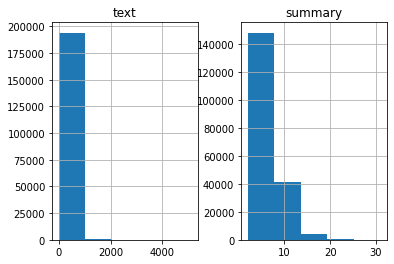

In [ ]:
pre['cleaned_text'] = pd.Series(text)
pre['cleaned_summary'] = pd.Series(summary)
text_count = []
summary_count = []

for sent in pre['cleaned_text']:
    text_count.append(len(sent.split()))
for sent in pre['cleaned_summary']:
    summary_count.append(len(sent.split()))

graph_df= pd.DataFrame()
graph_df['text']=text_count
graph_df['summary']=summary_count

import matplotlib.pyplot as plt

graph_df.hist(bins = 5)
plt.show()

# Check how much % of summary have 0-15 words

In [ ]:

cnt=0
for i in pre['cleaned_summary']:
    if(len(i.split())<=15):
        cnt=cnt+1
print(cnt/len(pre['cleaned_summary']))

0.9877030842577877


#Check how much % of text have 0-70 words


In [ ]:
cnt=0
for i in pre['cleaned_text']:
    if(len(i.split())<=100):
        cnt=cnt+1
print(cnt/len(pre['cleaned_text']))

0.7654071456857935


# Model to summarize the text between 0-15 words for Summary and 0-100 words for Text


In [ ]:
max_text_len=100
max_summary_len=15

#Select the Summaries and Text between max len defined above.

cleaned_text =np.array(pre['cleaned_text'])
cleaned_summary=np.array(pre['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre=pd.DataFrame({'text':short_text,'summary':short_summary})

post_pre.head(2)

,text,summary
0,they look good and stick good just don like the rounded shape because was always bumping it and siri kept popping up and it was irritating just won buy product like this again,_START_ looks good _END_
1,these stickers work like the review says they do they stick on great and they stay on the phone they are super stylish and can share them with my sister,_START_ really great product. _END_


# Add sostok and eostok at

In [ ]:
 
post_pre['summary'] = post_pre['summary'].apply(lambda x : 'sostok '+ x + ' eostok')
post_pre.head(2)

,text,summary
0,they look good and stick good just don like the rounded shape because was always bumping it and siri kept popping up and it was irritating just won buy product like this again,sostok _START_ looks good _END_ eostok
1,these stickers work like the review says they do they stick on great and they stay on the phone they are super stylish and can share them with my sister,sostok _START_ really great product. _END_ eostok


# Prepare a tokenizer for reviews on training data

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(post_pre['text']),np.array(post_pre['summary']),test_size=0.1,random_state=0,shuffle=True)

#Lets tokenize the text to get the vocab count , you can use Spacy here also.

from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [ ]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 68.65301801910168
Total Coverage of rare words: 0.6868021060816925




*   Prepare a tokenizer for reviews on training data
*   Convert text sequences into integer sequences (i.e one-hot encodeing all the words)
*   Padding zero upto maximum length
*   Size of vocabulary ( +1 for padding token)


In [ ]:

x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)


x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')


x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 13031


# Prepare a tokenizer for reviews on training data

In [ ]:

y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 75.05241090146751
Total Coverage of rare words: 1.5008186832994648




*   Prepare a tokenizer for reviews on training data
*   Convert text sequences into integer sequences (i.e one hot encode the text in Y)
*   Padding zero upto maximum length
*   Size of vocabulary



In [ ]:

y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))


y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 


y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')


y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 2976


In [ ]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

# Creating Seq2Seq natural processing model

We can build a Seq2Seq model on any problem which involves sequential information. This includes Sentiment classification, Neural Machine Translation, and Named Entity Recognition – some very common applications of sequential information.

In the case of Neural Machine Translation, the input is a text in one language and the output is also a text in another language:

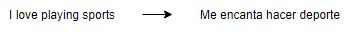

In the Named Entity Recognition, the input is a sequence of words and the output is a sequence of tags for every word in the input sequence:

ner.jpg.jpg


Our objective is to build a text summarizer where the input is a long sequence of words (in a text body), and the output is a short summary (which is a sequence as well). So, we can model this as a Many-to-Many Seq2Seq problem. Below is a typical Seq2Seq model architecture:


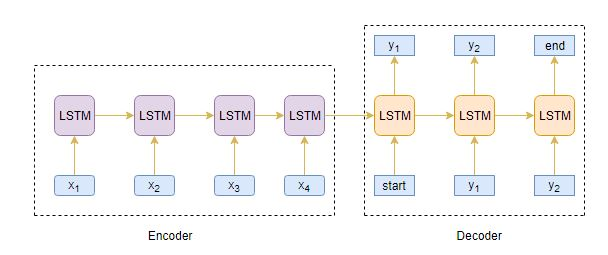

In [ ]:
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

print("Size of vocabulary from the w2v model = {}".format(x_voc))

K.clear_session()

latent_dim = 300
embedding_dim=200

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()


Size of vocabulary from the w2v model = 13031
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 200)     2606200     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 100, 300), ( 601200      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
_________________________________________

# Training the model

In [ ]:
from keras.callbacks import ModelCheckpoint

path_model= '/content/drive/MyDrive/TFD/model_filter.h5' # save model at this location after each epoch
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics= ['acc'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=1,callbacks=[es, ModelCheckpoint(filepath=path_model)],batch_size=128, 
                  validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

1040/1040 [==============================] - 1210s 1s/step - loss: 1.4139 - acc: 0.7713 - val_loss: 1.2374 - val_acc: 0.7891


In [ ]:
import tensorflow as tf
path_model= r'/content/drive/MyDrive/TFD/model_filter.h5' 

model = tf.keras.models.load_model(path_model)

print(model.summary())

"import tensorflow as tf\npath_model= r'/content/drive/MyDrive/TFD/model_filter.h5' \n\nmodel = tf.keras.models.load_model(path_model)\n\nprint(model.summary())"

# Encoding input sequence

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index


# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

# To retreive the decoded summary text from Seq2Seq natural processing model. 

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    #print(e_out, e_h, e_c) 
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

#Let us define the functions to convert an integer sequence to a word sequence for summary as well as the reviews:

def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

# Run the model over the data to see the results

for i in range(0,6):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Review: fantastic cases and great price for of them made of runner but more of hard plastic ish rubber good buy for anyone with lumia 520 
Original summary: start great cases end 
Predicted summary:  start great end


Review: great piece use this watch everyday battery lady about week charges real fast i needed water proof watch which this does great my only issue had which could be bad and was is the band gave me major so guess to it so had to just put barrier in between the watch and my skin duct tape for temporary will have to order watch band on line people alway comment on it all the time 
Original summary: start great smart watch end 
Predicted summary:  start works great end


Review: big and bulky very expensive rubber case will not fit into pouch seems too loose as fit 
Original summary: start ok just to big end 
Predicted summary:  start great case end


Review: what can say it an android plush it nice and soft comes with little cloth bag the jersey is removable also if you w

# To extract Subjects from the predicted summary: 

In [ ]:
import requests
r = df

from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text, 'html.parser')
title = soup.find('title').get_text()
document = ' '.join([p.get_text() for p in soup.find_all('p')])

document = re.sub(‘[^A-Za-z .-]+’, ‘ ‘, document)
document = ‘ ‘.join(document.split())
document = ‘ ‘.join([i for i in document.split() if i not in stop])

words = nltk.tokenize.word_tokenize(document)
words = [word.lower() for word in words if word not in stop]
fdist = nltk.FreqDist(words)
most_freq_nouns = [w for w, c in fdist.most_common(10)
                   if nltk.pos_tag([w])[0][1] in NOUNS]

subject_nouns = [entity for entity in top_10_entities
                 if entity.split()[0] in most_freq_nouns]

train_sents = nltk.corpus.brown.tagged_sents()
train_sents += nltk.corpus.conll2000.tagged_sents()
train_sents += nltk.corpus.treebank.tagged_sents()

# Create instance of SubjectTrigramTagger
trigram_tagger = SubjectTrigramTagger(train_sents)

# Output Format 

## 1. Predicted Summary text 
## 2. Extracting this summary text
```
start great case end
```
## to 
```
great case
```
## 3. Extract subject from this sentence as 

```
case
```
## 4. Voila! The retrieved subject from  the sentence is the tag we were looking for. 